**Function and modules for data preparation and visualization**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
from pandas.plotting import scatter_matrix
import matplotlib
import sklearn

import warnings
warnings.filterwarnings('ignore')
import re
import os

**Function and modules for the supervised Classification models**

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

**Function and modules for data analysis and model evaluation**

In [3]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold,ShuffleSplit
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn import model_selection
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import log_loss
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import matthews_corrcoef

**Read inputs & outputs (Data)**

In [4]:
df=pd.read_csv('Liver_GSE76427.csv',)

In [5]:
df.dropna()

,samples,type,ILMN_1762337,ILMN_2055271,ILMN_1736007,ILMN_2383229,ILMN_1806310,ILMN_1779670,ILMN_1653355,ILMN_1717783,...,ILMN_2348512,ILMN_1743643,ILMN_1794932,ILMN_1723439,ILMN_1656676,ILMN_2371169,ILMN_1701875,ILMN_1786396,ILMN_1653618,ILMN_2137536
0,PT19,HCC,6.483652,7.464696,6.429637,12.643356,13.045297,8.258473,6.814521,6.218216,...,7.400918,8.038800,6.588653,6.321273,10.675905,8.626528,10.007827,8.392028,9.602142,9.047503
1,PT62,HCC,6.675508,7.168535,6.823190,12.892783,13.163113,7.917084,6.730343,6.187852,...,7.330587,8.657990,6.674280,6.420554,11.143268,9.073550,10.258200,8.381577,9.754209,9.182012
2,PT21,HCC,6.515373,7.634200,7.664664,12.657452,12.706686,7.637631,6.801475,6.319660,...,7.146508,8.196419,6.582036,6.379465,10.870256,9.788805,10.973116,8.427726,9.189877,8.803280
3,PT63,HCC,6.545082,7.624268,6.833015,12.119426,12.309892,7.426821,6.993757,6.345142,...,7.077401,7.656076,6.469087,6.376006,11.226305,9.905931,11.385620,8.042074,9.321682,8.658508
4,PT46,HCC,6.487748,7.568733,6.526021,12.582264,12.780629,7.654119,6.767617,6.188435,...,7.078663,8.270020,6.572853,6.334645,10.899285,9.078503,10.219356,7.566979,8.941648,8.368998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,ANTT84,normal,6.601354,7.506110,7.365103,13.388869,13.899814,9.209282,6.942029,6.192877,...,7.326511,8.395377,6.687637,6.320202,12.584115,8.930516,9.335457,9.385184,8.841834,9.766702
161,ANTT14,normal,6.595213,6.969642,6.739490,13.486136,13.706575,10.217207,6.616688,6.326452,...,7.114267,8.711911,7.019267,6.407307,12.688633,8.805502,9.364516,9.827440,8.898209,9.679284
162,ANTT37,normal,6.665324,7.265585,7.640608,13.477023,13.814035,9.734760,6.783744,6.391265,...,7.331266,8.563802,6.654143,6.368024,12.698204,8.766173,9.281295,8.991965,9.124838,9.406808
163,ANTT82,normal,6.683772,6.799760,6.834131,13.404657,13.840479,9.491236,6.701240,6.211523,...,7.401761,8.878578,6.600538,6.486632,12.207204,8.964309,9.443194,9.512072,9.059498,9.879122


In [6]:
df.type.isnull().sum()

0

<AxesSubplot:>

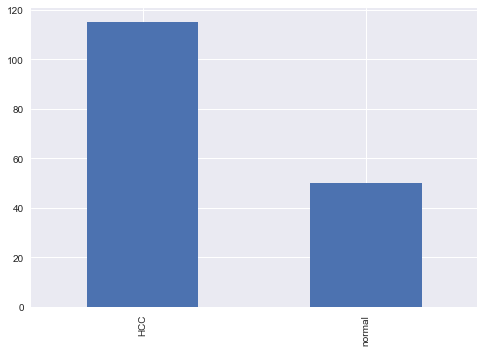

In [146]:
df['type'].value_counts().plot(kind="bar")

In [7]:
DF_RM_DUP = df.drop_duplicates()

In [8]:
dft=df.drop(columns = ['samples'])

In [9]:
dft.head()

,type,ILMN_1762337,ILMN_2055271,ILMN_1736007,ILMN_2383229,ILMN_1806310,ILMN_1779670,ILMN_1653355,ILMN_1717783,ILMN_1705025,...,ILMN_2348512,ILMN_1743643,ILMN_1794932,ILMN_1723439,ILMN_1656676,ILMN_2371169,ILMN_1701875,ILMN_1786396,ILMN_1653618,ILMN_2137536
0,HCC,6.483652,7.464696,6.429637,12.643356,13.045297,8.258473,6.814521,6.218216,6.698026,...,7.400918,8.038800,6.588653,6.321273,10.675905,8.626528,10.007827,8.392028,9.602142,9.047503
1,HCC,6.675508,7.168535,6.823190,12.892783,13.163113,7.917084,6.730343,6.187852,6.683403,...,7.330587,8.657990,6.674280,6.420554,11.143268,9.073550,10.258200,8.381577,9.754209,9.182012
2,HCC,6.515373,7.634200,7.664664,12.657452,12.706686,7.637631,6.801475,6.319660,6.554877,...,7.146508,8.196419,6.582036,6.379465,10.870256,9.788805,10.973116,8.427726,9.189877,8.803280
3,HCC,6.545082,7.624268,6.833015,12.119426,12.309892,7.426821,6.993757,6.345142,6.568781,...,7.077401,7.656076,6.469087,6.376006,11.226305,9.905931,11.385620,8.042074,9.321682,8.658508
4,HCC,6.487748,7.568733,6.526021,12.582264,12.780629,7.654119,6.767617,6.188435,6.724583,...,7.078663,8.270020,6.572853,6.334645,10.899285,9.078503,10.219356,7.566979,8.941648,8.368998


In [10]:
ord_enc = OrdinalEncoder()
dft["type"] = ord_enc.fit_transform(dft[["type"]])

In [11]:
X=dft.drop(columns = ['type'])

In [148]:
y=dft['type']
y=pd.DataFrame(y)
y

,type
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
160,1.0
161,1.0
162,1.0
163,1.0


<AxesSubplot:xlabel='type'>

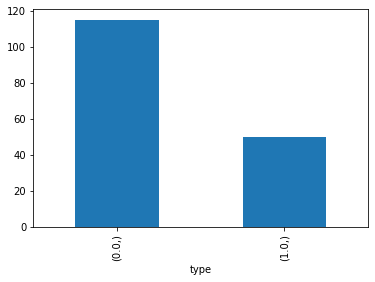

In [13]:
y.value_counts().plot(kind="bar")

# work with features as full data & classes or target for it's output

In [14]:
kfold=KFold(n_splits=10, random_state=42, shuffle=True)

# GridSearch Implementation 

## Knn

In [15]:
kn_classifier = KNeighborsClassifier()

In [16]:
param_grid_kn = {   
    'n_neighbors':[1,3,5,7,9,11,13,15],
    'weights':['uniform','distance'],
    'leaf_size':[10,30,],
}

In [17]:
kn_tuned =GridSearchCV(kn_classifier,param_grid=param_grid_kn, cv=kfold, verbose=2, n_jobs=4,scoring ="accuracy")

In [18]:
kn_tuned.fit(X, y.values.ravel())

Fitting 10 folds for each of 32 candidates, totalling 320 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=KNeighborsClassifier(), n_jobs=4,
             param_grid={'leaf_size': [10, 30],
                         'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=2)

In [19]:
print(kn_tuned.best_score_)
print(kn_tuned.best_params_)

0.9341911764705882
{'leaf_size': 10, 'n_neighbors': 5, 'weights': 'uniform'}


## SVC

In [20]:
svc_classifier = SVC()

In [21]:
param_grid_svm = {
    'C': [1,5,10,15,20,.1,30],
    'gamma': [ 'scale','auto'],
    'kernel': ['rbf','linear'],
}

In [22]:
svc_tuned =GridSearchCV(svc_classifier,param_grid=param_grid_svm,verbose=2, n_jobs=4,cv=5,scoring ="accuracy"  )

In [23]:
svc_tuned.fit(X,  y.values.ravel())

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=SVC(), n_jobs=4,
             param_grid={'C': [1, 5, 10, 15, 20, 0.1, 30],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['rbf', 'linear']},
             scoring='accuracy', verbose=2)

In [24]:
print(svc_tuned.best_score_)
print(svc_tuned.best_params_)

0.9515151515151515
{'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}


# RF

In [25]:
rf_classifier = RandomForestClassifier()

In [26]:
param_grid_rf = {
    'n_estimators': [20,40,60,80,100,],
    'max_depth':[1,3,5,None],
    'criterion':['gini','entropy',],
    'max_features':['sqrt','log2',],
    'random_state':[42],
}

In [27]:
rf_tuned = GridSearchCV(
    rf_classifier, param_grid=param_grid_rf, cv=kfold, verbose=2, n_jobs=4,scoring ="accuracy" )

In [28]:
rf_tuned.fit(X,  y.values.ravel())

Fitting 10 folds for each of 80 candidates, totalling 800 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 3, 5, None],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [20, 40, 60, 80, 100],
                         'random_state': [42]},
             scoring='accuracy', verbose=2)

In [29]:
print(rf_tuned.best_score_)
print(rf_tuned.best_params_)

0.9573529411764706
{'criterion': 'gini', 'max_depth': 1, 'max_features': 'sqrt', 'n_estimators': 20, 'random_state': 42}


**Train Test Split :**

**we trained the features split percentages (Train: 65%, Test: 35%)**

In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.35, random_state=42,)

## KNN

In [31]:
knn=KNeighborsClassifier()

In [32]:
knn.fit(X_train,Y_train)

KNeighborsClassifier()

In [33]:
knn.score(X_train, Y_train) #Train Score

0.9532710280373832

In [34]:
KNNaccuracy=knn.score(X_test, Y_test) #Test Score
KNNaccuracy

0.8620689655172413

In [35]:
from sklearn.metrics import classification_report
y_pred=knn.predict(X_test)
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.97      0.83      0.89        41
         1.0       0.70      0.94      0.80        17

    accuracy                           0.86        58
   macro avg       0.83      0.89      0.85        58
weighted avg       0.89      0.86      0.87        58



## svm

In [36]:
svc =SVC()

In [37]:
svc.fit(X_train,Y_train)

SVC()

In [38]:
svc.score(X_train, Y_train) #Train Score

0.9626168224299065

In [39]:
SVCaccuracy=svc.score(X_test, Y_test) #Test Score
SVCaccuracy

0.9310344827586207

In [40]:
from sklearn.metrics import classification_report
y_pred=svc.predict(X_test)
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.97      0.93      0.95        41
         1.0       0.84      0.94      0.89        17

    accuracy                           0.93        58
   macro avg       0.91      0.93      0.92        58
weighted avg       0.94      0.93      0.93        58



## RF

In [41]:
rf =RandomForestClassifier()

In [42]:
rf.fit(X_train,Y_train)

RandomForestClassifier()

In [43]:
rf.score(X_train, Y_train) #Train Score

1.0

In [44]:
RFaccuracy=rf.score(X_test, Y_test) #Test Score
RFaccuracy

0.9482758620689655

In [45]:
from sklearn.metrics import classification_report
y_pred=rf.predict(X_test)
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.97      0.95      0.96        41
         1.0       0.89      0.94      0.91        17

    accuracy                           0.95        58
   macro avg       0.93      0.95      0.94        58
weighted avg       0.95      0.95      0.95        58



### Before Feature Selection and Parameters Tuning

[(0.0, 100.0)]

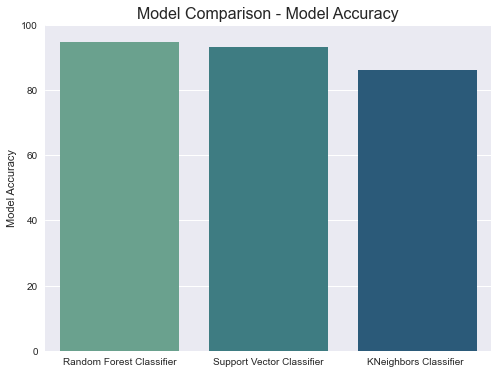

In [46]:
plt.style.use("seaborn")

xl1 = ["Random Forest Classifier",  
     "Support Vector Classifier","KNeighbors Classifier "]

yv1 = [RFaccuracy*100, 
     SVCaccuracy*100,
     KNNaccuracy*100,]

fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(x=xl1,y=yv1, palette="crest");
plt.ylabel("Model Accuracy")
plt.title("Model Comparison - Model Accuracy", fontsize=16, fontname="arial", y=1);
ax.set(ylim=(0, 100))

# Feature selection Code :

In [140]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
select=SelectKBest(chi2, k=10000)
X_train_selected = select.fit_transform(X_train, Y_train)
X_test_selected= select.transform(X_test)

# Evalutaed models

### Random Forest

In [141]:
rf_evalutaed =RandomForestClassifier(**rf_tuned.best_params_)

In [142]:
rf_evalutaed.fit(X_train_selected,Y_train)

RandomForestClassifier(max_depth=1, max_features='sqrt', n_estimators=20,
                       random_state=42)

In [143]:
rf_evalutaed.score(X_train_selected, Y_train) #Train Score

0.9719626168224299

In [144]:
RFTaccuracy=rf_evalutaed.score(X_test_selected, Y_test) #Test Score
RFTaccuracy

0.9655172413793104

In [145]:
from sklearn.metrics import classification_report
y_pred=rf_evalutaed.predict(X_test_selected)
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98        41
         1.0       0.94      0.94      0.94        17

    accuracy                           0.97        58
   macro avg       0.96      0.96      0.96        58
weighted avg       0.97      0.97      0.97        58



### SVC

In [110]:
svc_evalutaed =SVC(**svc_tuned.best_params_)

In [111]:
svc_evalutaed.fit(X_train_selected,Y_train)

SVC(C=1)

In [112]:
svc_evalutaed.score(X_train_selected, Y_train) #Train Score

0.9626168224299065

In [113]:
SVCTaccuracy=svc_evalutaed.score(X_test_selected, Y_test) #Test Score
SVCTaccuracy

0.9310344827586207

In [114]:
from sklearn.metrics import classification_report
y_pred=svc_evalutaed.predict(X_test_selected)
print(confusion_matrix(Y_test, y_pred))
print(classification_report(Y_test, y_pred))

[[38  3]
 [ 1 16]]
              precision    recall  f1-score   support

         0.0       0.97      0.93      0.95        41
         1.0       0.84      0.94      0.89        17

    accuracy                           0.93        58
   macro avg       0.91      0.93      0.92        58
weighted avg       0.94      0.93      0.93        58



### KNeighbors

In [115]:
knn_evalutae=KNeighborsClassifier(**kn_tuned.best_params_)

In [116]:
knn_evalutae.fit(X_train_selected,Y_train)

KNeighborsClassifier(leaf_size=10)

In [117]:
knn_evalutae.score(X_train_selected, Y_train) #Train Score

0.9626168224299065

In [118]:
KNNTaccuracy=knn_evalutae.score(X_test_selected, Y_test) #Test Score
KNNTaccuracy

0.8793103448275862

In [119]:
from sklearn.metrics import classification_report
y_pred=knn_evalutae.predict(X_test_selected)
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.97      0.85      0.91        41
         1.0       0.73      0.94      0.82        17

    accuracy                           0.88        58
   macro avg       0.85      0.90      0.86        58
weighted avg       0.90      0.88      0.88        58



## After Feature Selection

[(0.0, 100.0)]

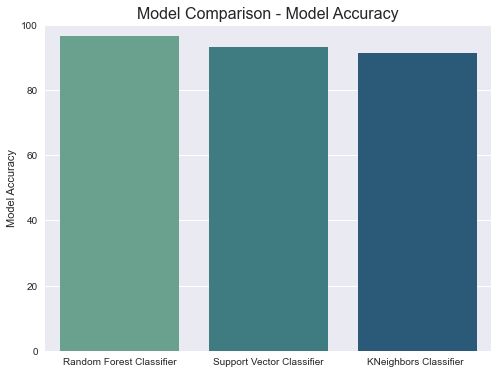

In [63]:
plt.style.use("seaborn")

x = ["Random Forest Classifier",  
     "Support Vector Classifier","KNeighbors Classifier "]

y = [RFTaccuracy*100, 
     SVCTaccuracy*100,
     KNNTaccuracy*100,]

fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(x=x,y=y, palette="crest");
plt.ylabel("Model Accuracy")
plt.title("Model Comparison - Model Accuracy", fontsize=16, fontname="arial", y=1);
ax.set(ylim=(0, 100))

In [149]:
from joblib import dump

dump(rf_evalutaed, './Liver_cancer_RF.joblib')
Y_test=Y_test.replace({0: 'Tumoral', 1: 'Normal'})
pd.DataFrame(Y_test).to_csv('Liver_result',)
pd.DataFrame(X_test_selected).to_csv('Liver_test',)


In [125]:
from genetic_selection import GeneticSelectionCV

selectors = GeneticSelectionCV(svc_evalutaed,
                               cv=kfold,
                               verbose=1,
                               scoring='accuracy',
                               n_population=60,
                               crossover_proba=0.60,
                               mutation_proba=0.2,
                               n_generations=50,
                               crossover_independent_proba=0.6,
                               mutation_independent_proba=0.06,
                               tournament_size=8,
                               caching=True,
                               n_jobs=4)
selectors = selectors.fit(X_train, Y_train)


Selecting features with genetic algorithm.
gen	nevals	avg                                        	std                                        	min                                  	max                                        
0  	60    	[     0.961621  25753.266667      0.045783]	[     0.003918  12671.250875      0.000254]	[   0.943636  337.          0.045717]	[     0.962727  46946.            0.047378]
1  	48    	[     0.962561  12604.35          0.045745]	[    0.00128   4342.078925     0.000213]   	[    0.952727  7078.           0.045717]	[     0.962727  34016.            0.047378]
2  	45    	[    0.962409  8487.266667     0.045757]   	[    0.001715  1182.631147     0.00023 ]   	[    0.952727  7078.           0.045717]	[     0.962727  11759.            0.047378]
3  	35    	[    0.962409  7435.05         0.045724]   	[   0.002444  662.083112    0.000054]      	[    0.943636  7078.           0.045717]	[    0.962727  9526.           0.04614 ]   
4  	35    	[    0.962727  7444.55         0

44 	41    	[    0.962727  7478.383333     0.045717]   	[   0.        801.165382    0.      ]      	[    0.962727  7078.           0.045717]	[    0.962727  9175.           0.045717]   
45 	41    	[    0.962727  7407.85         0.045717]   	[   0.        737.807107    0.      ]      	[    0.962727  7078.           0.045717]	[    0.962727  9148.           0.045717]   
46 	39    	[    0.962727  7471.85         0.045717]   	[   0.        788.200013    0.      ]      	[    0.962727  7078.           0.045717]	[    0.962727  9161.           0.045717]   
47 	34    	[    0.962727  7443.1          0.045717]   	[   0.        770.916591    0.      ]      	[    0.962727  7078.           0.045717]	[    0.962727  9163.           0.045717]   
48 	40    	[    0.962727  7508.466667     0.045717]   	[   0.        818.914983    0.      ]      	[    0.962727  7078.           0.045717]	[    0.962727  9154.           0.045717]   
49 	42    	[    0.962727  7375.65         0.045717]   	[   0.        708.918115 

In [126]:
print('Feature Selection:', X_train.columns[selectors.support_])

Feature Selection: Index(['ILMN_2383229', 'ILMN_3241953', 'ILMN_2295559', 'ILMN_1675204',
       'ILMN_1752884', 'ILMN_1668851', 'ILMN_1880387', 'ILMN_1698189',
       'ILMN_1670117', 'ILMN_1758523',
       ...
       'ILMN_1668540', 'ILMN_1692486', 'ILMN_1769503', 'ILMN_3247732',
       'ILMN_1789410', 'ILMN_1725718', 'ILMN_3244172', 'ILMN_1777061',
       'ILMN_2374633', 'ILMN_1653209'],
      dtype='object', length=7078)


In [127]:
selectors.score(X_train, Y_train) #Train Score

0.9626168224299065

In [128]:
selectors.score(X_test, Y_test) #Test Score

0.9310344827586207

In [129]:
from sklearn.metrics import classification_report
y_pred=selectors.predict(X_test)
print(confusion_matrix(Y_test, y_pred))
print(classification_report(Y_test, y_pred))

[[38  3]
 [ 1 16]]
              precision    recall  f1-score   support

         0.0       0.97      0.93      0.95        41
         1.0       0.84      0.94      0.89        17

    accuracy                           0.93        58
   macro avg       0.91      0.93      0.92        58
weighted avg       0.94      0.93      0.93        58

